In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np

In [11]:
df = pd.read_csv("VoteRewards598.csv")
df

In [93]:
print(f"Total amount of voting rewards distributed during epoch 598: \n{df['Reward'].sum()} SOL\n\nThe maximum voting reward received during epoch 598:\n{df['Reward'].max()} SOL, received by validator'{df.loc[df['Reward'].idxmax(), 'VotePubkey']}'\n\nThe minimum voting reward received during epoch 598: \n{df['Reward'].min()} SOL, received by validators, who set their commission to 0\n\nThe mean voting reward amount during epoch 598:\n{round(df['Reward'].mean(),2)}\n\nThe median voting reward amount during epoch 598:\n{round(df['Reward'].median(),2)}")

Total amount of voting rewards distributed during epoch 598: 
50281.51 SOL

The maximum voting reward received during epoch 598:
2304.15 SOL, received by validator'G9x1mqewTeVnXLmv3FamYD5tq1AdS395RHH3MLQPj6TY'

The minimum voting reward received during epoch 598: 
0.0 SOL, received by validators, who set their commission to 0

The mean voting reward amount during epoch 598:
29.1

The median voting reward amount during epoch 598:
1.75


There is a significant difference between the mean and the median, which indicates a highly skewed distribution:  A few validators receive the majority of the voting rewards. The numbers are even more extrem considering that 315 validatorsare are setting their comission to 0 and are not receiving any rewards. 

In [162]:
co_counts_sorted = df["Commission"].value_counts().to_frame()
co_counts_sorted.sort_index(ascending=True)

,count
Commission,
0,315
1,10
2,10
3,21
4,14
5,53
6,10
7,1076
8,18


Text(0, 0.5, 'Count')

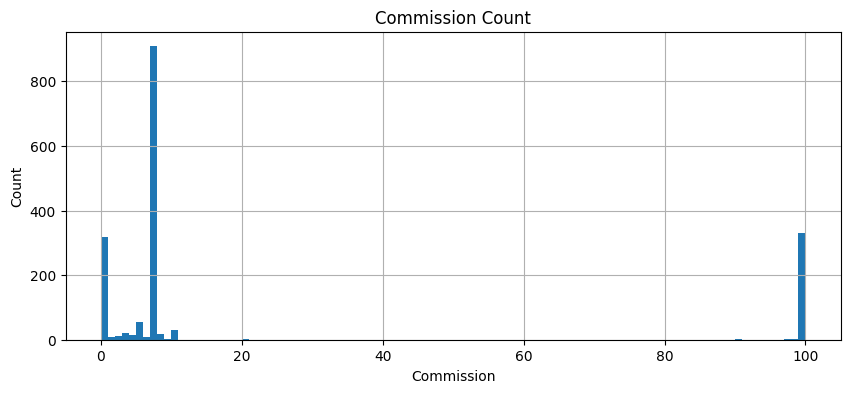

In [72]:
df['Commission'].hist(figsize=(10,4), bins=100)
plt.title('Commission Count')
plt.xlabel('Commission')
plt.ylabel('Count')

We can observe that 315 validators, approximately 18% of the total, have set their commission to 0. This strategy is likely an attempt to attract more delegators and build trust. About 9% of all validators have set their commission to 100%, choosing to retain all rewards generated. The majority of validators opt for a commission rate below 10%. There seems to be an equilibrium at 7%, with over 62% of validators selecting this rate for their commission in this epoch. 

In [22]:
# Filtering out rows where Commission is 0 or 100
filtered_df = df[(df['Commission'] != 0) & (df['Commission'] != 100)]
filtered_df.loc[filtered_df['Reward'].idxmax()]


VotePubkey        6D2jqw9hyVCpppZexquxa74Fn33rJzzBx38T58VucHx9
VoteCredits                                             360083
ActivatedStake                                      14618223.1
Commission                                                   8
Reward                                                  522.54
Name: 919, dtype: object

In [34]:
print(f"Among the validators that set their commission to anything other than 0 and 100,\nwe can see that validator with the public key '{filtered_df.loc[filtered_df['Reward'].idxmax()]['VotePubkey']}' earned the largest absolute commission: {filtered_df.loc[filtered_df['Reward'].idxmax()]['Reward']}.\nThat validator was using a commission rate of {filtered_df.loc[filtered_df['Reward'].idxmax()]['Commission']}% and had an active stake of {int(filtered_df.loc[filtered_df['Reward'].idxmax()]['ActivatedStake'])} SOL\nIndependent of the commission rate however, we can see that the majority of validators was not profitable in this epoch. ")

Among the validators that set their commission to anything other than 0 and 100,
we can see that validator with the public key '6D2jqw9hyVCpppZexquxa74Fn33rJzzBx38T58VucHx9' earned the largest absolute commission: 522.54.
That validator was using a commission rate of 8% and had an active stake of 14618223 SOL
Independent of the commission rate however, we can see that the majority of validators was not profitable in this epoch. 


In [36]:
df_adjusted = df[df['Commission'] != 0.00]
df_adjusted

,VotePubkey,VoteCredits,ActivatedStake,Commission,Reward
0,42U2eB71MKU7mqVpy5b63meM7Pd4YBqwAGSDevjJ9E9z,360398,20251.99,10,0.92
2,4TPBarwgZuuztwD7biHtt87L2BTmH4KjcePABijDeiyW,360506,8698.25,100,4.46
4,Ev683W2Xe56cJDG9Ja5rZDSVgWk1e5NVug3iJUWP2VZL,360659,10059.07,100,5.06
5,6DVFiYKvmPRvYjins4LtRSiEm81CswtP5yHTpgPdtrgK,361149,7169.20,100,3.93
7,J43U4RpHE4DX4XK1s9mvGYuYSL1ELPgK9eFPWdpA3j9y,360438,6876.48,100,4.08
...,...,...,...,...,...
1722,At2rZHk554qWrjcmdNkCQGp8i4hdKLf52EXMrDmng5ab,360620,2502415.69,100,1137.63
1723,8EQwZusrHgjZyDKXVdtsCeGNsL6VmEB5xq2EP6XK4AUq,360650,36660.61,7,1.16
1725,EWQfCyftKLVbeJtJ4idbLDcDFSGaZ6bZHGS5vboUx3VR,360535,52477.10,7,1.89
1726,5afRnmkFn1pRU9oussqwk1RRBVyoDgUkL16Jz4qNf574,360118,48892.71,7,1.71


In [47]:
print(f"\nThe mean voting reward amount after removing 0 commission rates:\n{round(df_adjusted['Reward'].mean(),2)}\n\nThe median voting reward amount after removing 0 commission rates:\n{round(df_adjusted['Reward'].median(),2)}\n\nAfter removing zero commission rates, we continue to see the highly right-skewed distribution of rewards,\nwith the media value indicating that half of the validators earned less than 1.85 SOL in epoch 598.\nWe can attribute this large difference in reward distribution to a similiarily skewed distribution of stake.")


The mean voting reward amount after removing 0 commission rates:
35.67

The median voting reward amount after removing 0 commission rates:
1.84

After removing zero commission rates, we continue to see the highly right-skewed distribution of rewards,
with the media value indicating that half of the validators earned less than 1.85 SOL in epoch 598.
We can attribute this large difference in reward distribution to a similiarily skewed distribution of stake.


In [160]:
counts_sorted = df_adjusted['Reward'].value_counts().to_frame()
counts_sorted.sort_index(ascending=True)

,count
Reward,
0.00,34
0.01,1
0.02,3
0.03,2
0.04,1
...,...
1986.44,1
2128.22,1
2137.04,1


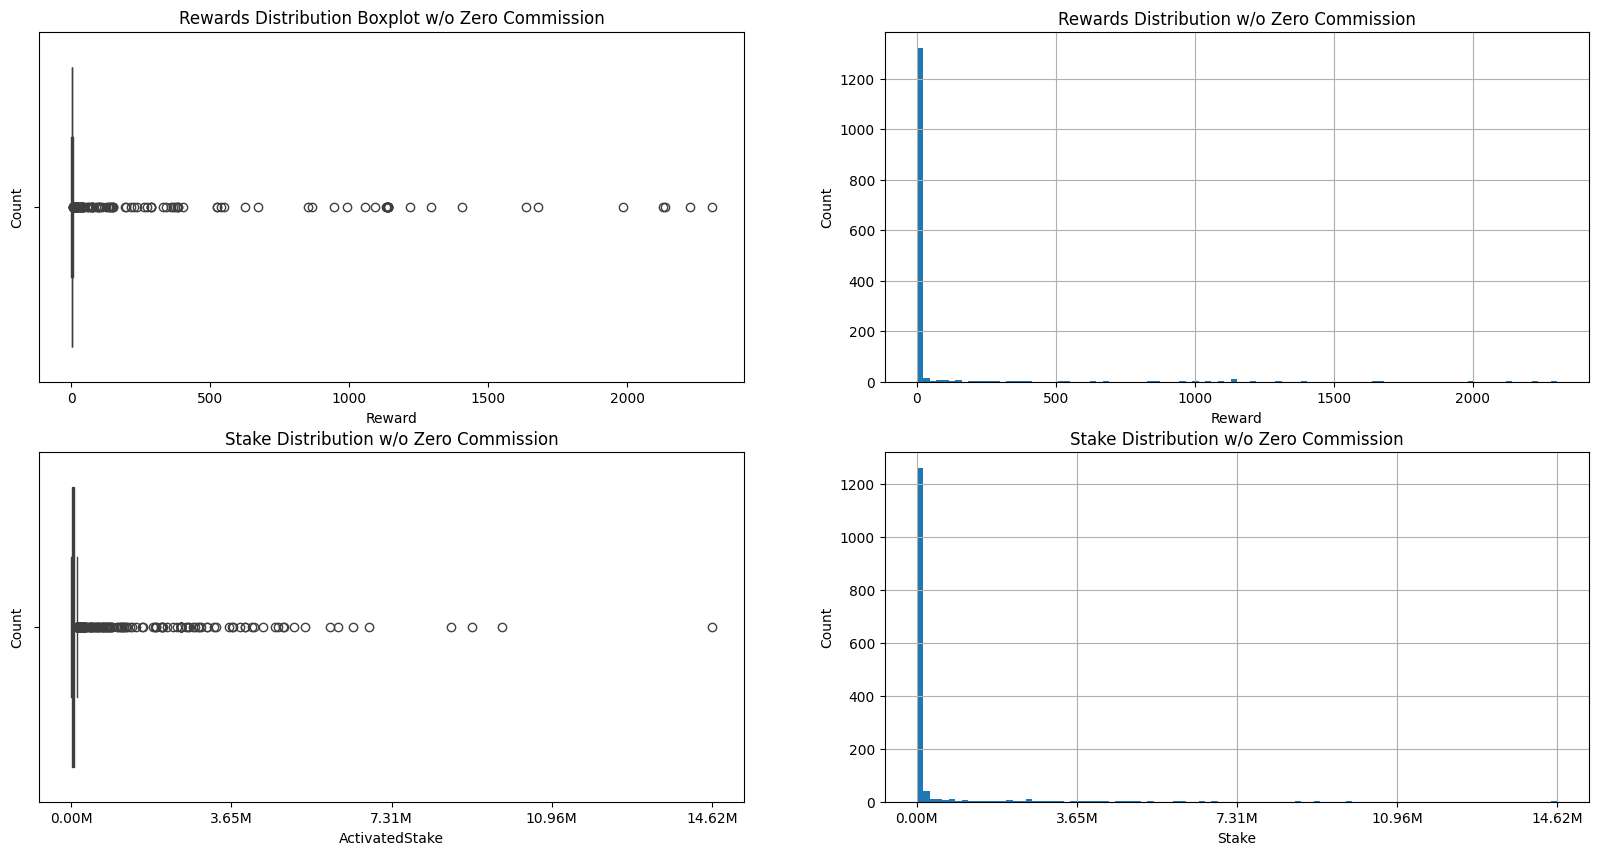

In [52]:
def millions_formatter(x, pos):
    return f'{x / 1e6:.2f}M'

plt.figure(figsize=(20,10)) 

plt.subplot(2, 2, 1)
sns.boxplot(x=df_adjusted['Reward'])
plt.title('Rewards Distribution Boxplot w/o Zero Commission')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
df_adjusted['Reward'].hist(bins=100)
plt.title('Rewards Distribution w/o Zero Commission')
plt.xlabel('Reward')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.boxplot(x=df_adjusted['ActivatedStake'])
plt.title('Stake Distribution w/o Zero Commission')
plt.ylabel('Count')

x_ticks = np.linspace(df['ActivatedStake'].min(), df['ActivatedStake'].max(), 5)
plt.xticks(x_ticks)
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.subplot(2, 2, 4)
df_adjusted['ActivatedStake'].hist( bins=100)
plt.title('Stake Distribution w/o Zero Commission')
plt.xlabel('Stake')
plt.ylabel('Count')

x_ticks = np.linspace(df['ActivatedStake'].min(), df['ActivatedStake'].max(), 5)
plt.xticks(x_ticks)
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()


In [62]:
print(f"Of the Validators, which set their commission higher than 0, {df_adjusted['Reward'].le(3).sum()} received less than 3 SOL for this epoch.")

Of the Validators, which set their commission higher than 0, 1024 received less than 3 SOL for this epoch.


We can observe that even after filtering out zero commission validators, the majority of rewards allocated to individual validators still range from 0 to 2 SOL. 
Considering that validators typically face an estimated transaction fee of 3 SOL per epoch, it's clear that a substantial portion of validators in that epoch remain unprofitable. This number will be higher, when factoring in hardware costs.

As seen in the charts above, the reward distribution aligns with the stake distribution. However, there isn't a purely linear correlation between stake and rewards. 


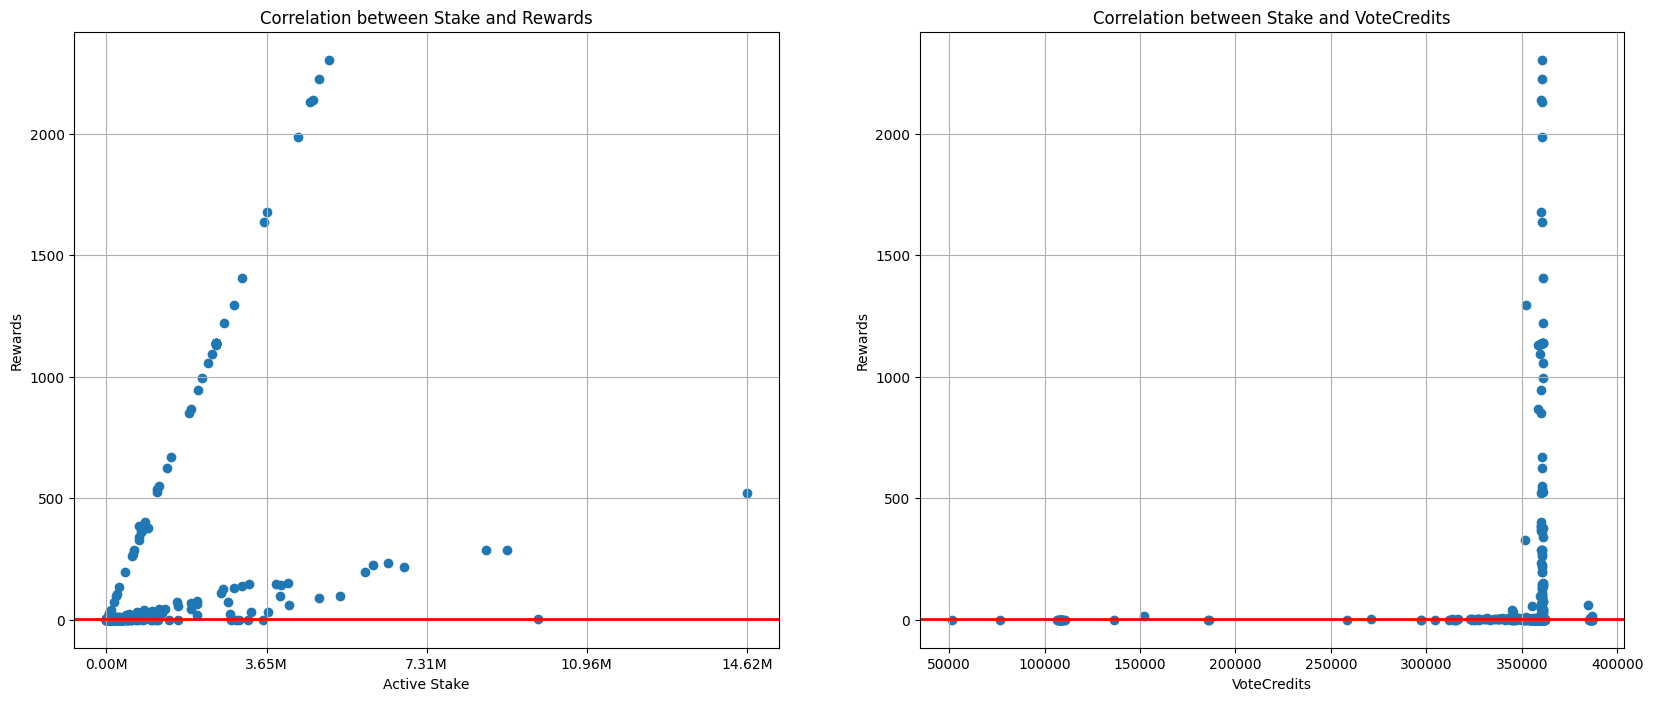

In [71]:
def millions_formatter(x, pos):
    return f'{x / 1e6:.2f}M'

plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
plt.scatter(df['ActivatedStake'], df['Reward'])
plt.ylabel('Rewards')
plt.xlabel('Active Stake')
plt.title('Correlation between Stake and Rewards')
plt.grid(True)

x_ticks = np.linspace(df['ActivatedStake'].min(), df['ActivatedStake'].max(), 5)
plt.xticks(x_ticks)
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.axhline(y=3, color='r', linestyle='-', linewidth=2)


plt.subplot(1, 2, 2)
plt.scatter(df['VoteCredits'], df['Reward'])
plt.ylabel('Rewards')
plt.xlabel('VoteCredits')
plt.title('Correlation between Stake and VoteCredits')
plt.grid(True)


plt.axhline(y=3, color='r', linestyle='-', linewidth=2)

plt.show()

We can observe a positive correlation between stake and rewards with a concentration of data points clustering at the lower end of the stake. Showing that the majority of the low rewards are received by validators with stake less than 3.65M SOL. However, we can also observe diminishing return on investment for stakes beyond 5M SOL, hinting at an upper threshold where additional staking does not proportionately increase profitability.

We also see a variabilty in rewards distribution for validators with higher stake. This seems to be related to performance, as we can see from the right chart, validators only really earn rewards after gaining more than 350000 vote credits. 
